In [43]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [76]:
df = pd.read_csv("C:\\Users\\vinay\\OneDrive\\Desktop\\Naresh DS\\user_data.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [78]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [101]:
x = df.iloc[:,[2,3]].values
y = df.iloc[:,4].values
y.reshape(1, -1)

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
        1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
        1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 

In [102]:
x = StandardScaler().fit_transform(x)

In [103]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)

In [104]:
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [105]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =10, metric = "minkowski", p = 5)
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10, p=5)

In [113]:
y_predict= classifier.predict(x_test)

In [115]:
from sklearn.metrics import confusion_matrix,accuracy_score
print("Matrix:", confusion_matrix(y_test,y_predict))
print("Accuracy :", accuracy_score(y_test,y_predict))

Matrix: [[64  4]
 [ 3 29]]
Accuracy : 0.93


In [137]:
#Visualization the model
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
X_set, Y_set = x_test,y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1,
stop = X_set[:,0].max() +1, step = 0.01),
np.arange(start = X_set[:,1].min() -1,
stop = X_set[: , 1].max() +1, step = 0.01))
print(X1)
print(X2)

[[-2.60035469 -2.59035469 -2.58035469 ...  3.05964531  3.06964531
   3.07964531]
 [-2.60035469 -2.59035469 -2.58035469 ...  3.05964531  3.06964531
   3.07964531]
 [-2.60035469 -2.59035469 -2.58035469 ...  3.05964531  3.06964531
   3.07964531]
 ...
 [-2.60035469 -2.59035469 -2.58035469 ...  3.05964531  3.06964531
   3.07964531]
 [-2.60035469 -2.59035469 -2.58035469 ...  3.05964531  3.06964531
   3.07964531]
 [-2.60035469 -2.59035469 -2.58035469 ...  3.05964531  3.06964531
   3.07964531]]
[[-2.68843113 -2.68843113 -2.68843113 ... -2.68843113 -2.68843113
  -2.68843113]
 [-2.67843113 -2.67843113 -2.67843113 ... -2.67843113 -2.67843113
  -2.67843113]
 [-2.66843113 -2.66843113 -2.66843113 ... -2.66843113 -2.66843113
  -2.66843113]
 ...
 [ 3.41156887  3.41156887  3.41156887 ...  3.41156887  3.41156887
   3.41156887]
 [ 3.42156887  3.42156887  3.42156887 ...  3.42156887  3.42156887
   3.42156887]
 [ 3.43156887  3.43156887  3.43156887 ...  3.43156887  3.43156887
   3.43156887]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


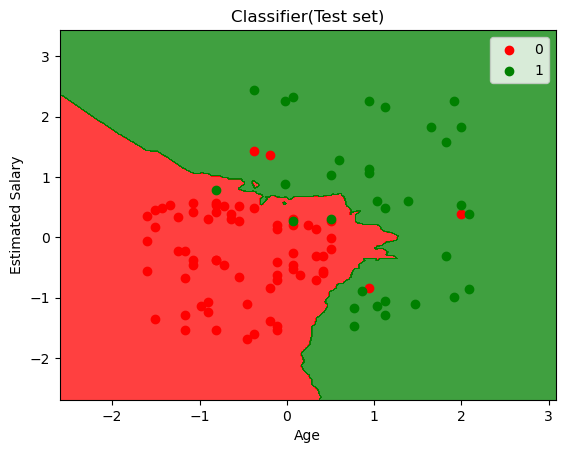

In [145]:
plt.contourf(X1,X2, classifier.predict(
np.array([X1.ravel(),X2.ravel()]).T).reshape(
    X1.shape), alpha = 0.75, cmap  = ListedColormap(("red", "green")))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(), X2.max())

for i , j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j,0], X_set[Y_set == j,1],
            c = ListedColormap(("red","green"))(i), label =j)
plt.title("Classifier(Test set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()